In [1]:
#import tensorflow as tf
from sqn_optimizer_hooks import SQNOptimizer
from sd_lbfgs import SdLBFGS
import hw1_functions as hw1
import numpy as np
from time import sleep
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
%matplotlib inline
sns.set_context('paper')

In [76]:
def squared_residual_func(A, b, order=0):
    def func(x):
        temp = np.dot(A, x) - b
        val = 0.5 * np.dot(np.transpose(temp), temp)
        if order == 0:
            return val
        if order == 1:
            grad = np.dot(np.dot(np.transpose(A), A), x) - np.dot(np.transpose(A), b)
            return (val, grad)
    return func

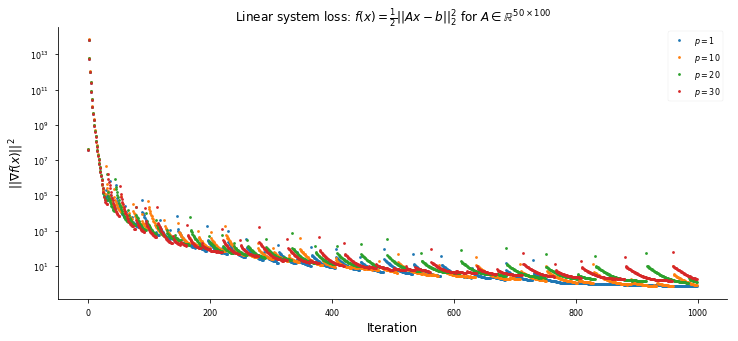

In [78]:
m = 50
n = 100

A = np.random.rand(m,n)
b = np.random.rand(m)

f_train = squared_residual_func(A, b, order=1)

fig, ax = plt.subplots(1,1, figsize=(12,5));
fs = 12
for mem_size in [1, 10, 20, 30]:
    init = np.random.rand(n)
    optimizer = SdLBFGS(f_train, init, mem_size=2)
    linear_result = optimizer.run();
    linear_x = np.array(linear_result['iteration_vals'])
    linear_y = np.array(linear_result['iteration_grad_errs'])
    ax.plot(linear_y, '.', label=f'$p = {mem_size}$')
ax.set_xlabel('Iteration', fontsize=fs)
ax.set_ylabel('$||\\nabla f(x) ||^2$', fontsize=fs)
ax.set_title('Linear system loss: $f(x) = \\frac{1}{2} \||Ax-b\||_2^2$ for $A \in \mathbb{R}^{' + f'{m} \\times {n}' + '}$', fontsize=fs)
ax.semilogy()
ax.legend()
sns.despine()

fig.savefig('../plots/linear_system_loss.eps', bbox_inches='tight')